In [1]:
%load_ext autoreload
%autoreload 2
import torch
import yaml
import logging
from imp import reload
import matplotlib.pyplot as plt
import yaml
import numpy as np
import os
from tqdm import tqdm
from load import load_data
tqdm.get_lock().locks = []
reload(logging)
logger = logging.getLogger(__name__).setLevel(logging.INFO)

In [57]:
par_train = {'data_dir'         : '/data/LiftPose3D/capture', # change the path 
             'out_dir'          : '/data/LiftPose3D/capture/out_across_animals',
             'train_session_id' : [1],
             'test_session_id'  : [0],
             'test_cam_id'      : [0,1,2,3,4,5]}

# merge with training parameters
par_data = yaml.full_load(open('param.yaml', "rb"))
par = {**par_data["data"], **par_train}

In [58]:
train_3d, train_2d, train_keypoints, test_3d, test_2d, test_keypoints, cams, train_fid, test_fid, train_2d_sh, test_2d_sh = load_data(par_train, return_frame_info=True)

Loading data...
OK


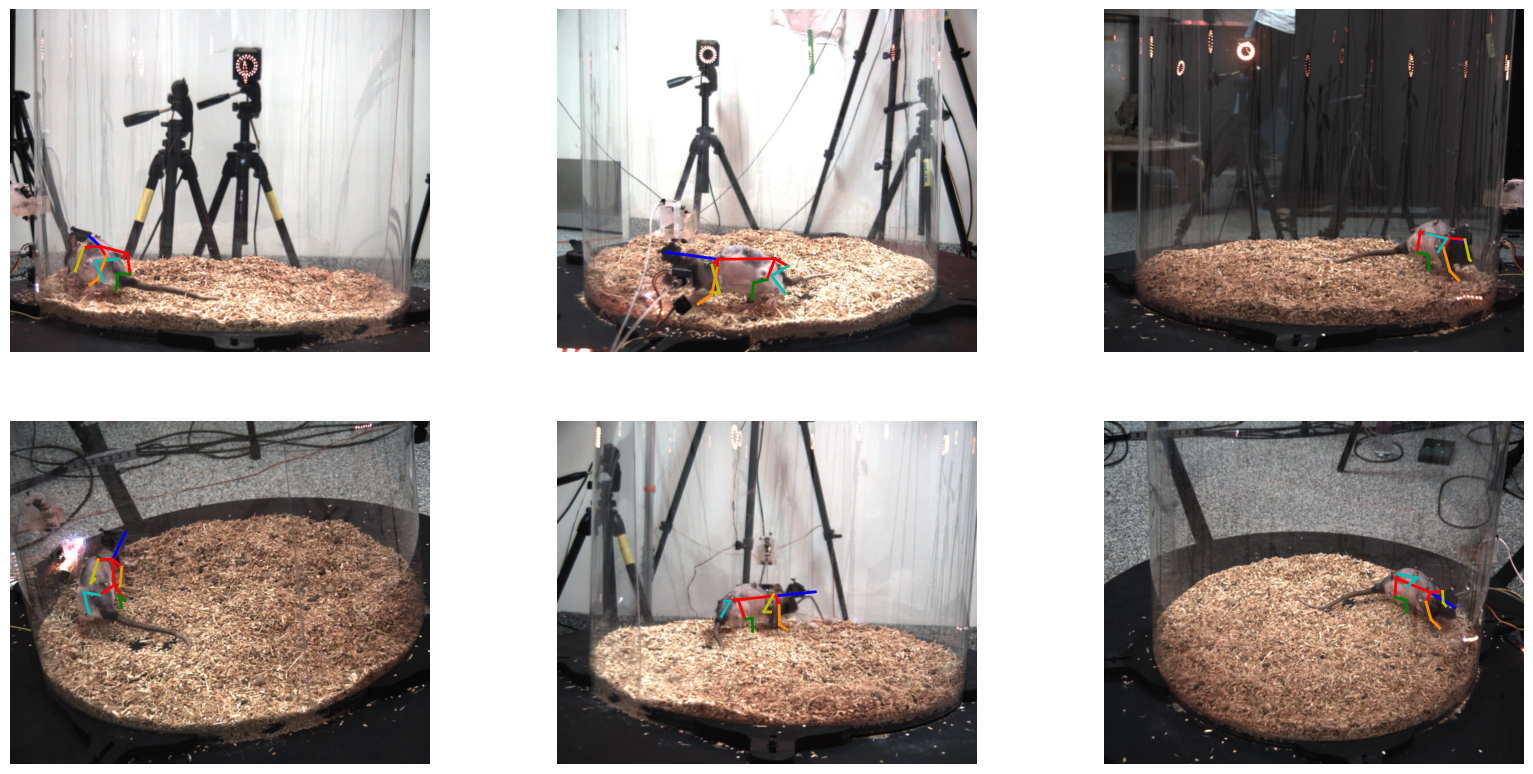

In [59]:
import matplotlib.pyplot as plt
from liftpose.plot import plot_pose_2d
%matplotlib inline

frame_id = 1141
idx = np.where(test_fid == frame_id)[0][0]

fig, axs = plt.subplots(nrows=2, ncols=3, dpi=100, figsize=(20,10))
axs = np.ravel(np.array(axs))
cam_list = ['R', 'L', 'E', 'U', 'S', 'U2']
l = test_2d_sh.shape[0]//len(par_train['test_cam_id'])
for cam_id, ax in enumerate(axs):
    ax.imshow(plt.imread(f'/mnt/NAS/SG/CAPTURE/images/rat7M_e0/sample0_{frame_id}_Camera{cam_list[cam_id]}.png'))
    pt = test_2d_sh[idx+cam_id*l].reshape(-1,2)
    plot_pose_2d(ax, 
        pt, 
        bones=par_data["vis"]["bones"], 
        limb_id=par_data["vis"]["limb_id"], 
        colors=par_data["vis"]["colors"],
        normalize=False
    )
    ax.axis('off')